In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


Data exploration

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [3]:
df['spam'].unique()

array([1, 0])

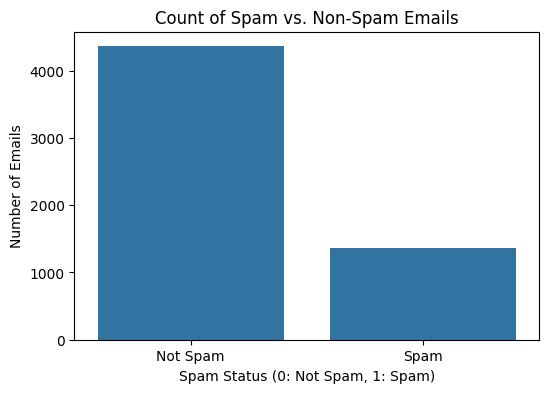

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='spam', data=df)
plt.title('Count of Spam vs. Non-Spam ')
plt.xlabel('Spam Status (0: Not Spam, 1: Spam)')
plt.ylabel('Number of Emails')
plt.xticks(ticks=[0, 1], labels=['Not Spam', 'Spam'])
plt.show()

In [4]:
df.shape

(5728, 2)

Text preprocessing

In [5]:
import nltk
from nltk.corpus import stopwords
import re
#Stop-word removal
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Load stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

df['text_cleaned'] = df['text'].apply(remove_stopwords)
display(df[['text', 'text_cleaned']].head())

,text,text_cleaned
0,Subject: naturally irresistible your corporate...,Subject: naturally irresistible corporate iden...
1,Subject: the stock trading gunslinger fanny i...,Subject: stock trading gunslinger fanny merril...
2,Subject: unbelievable new homes made easy im ...,Subject: unbelievable new homes made easy im w...
3,Subject: 4 color printing special request add...,Subject: 4 color printing special request addi...
4,"Subject: do not have money , get software cds ...","Subject: money , get software cds ! software c..."


In [7]:
#Lowercasing
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: x.lower())
display(df[['text', 'text_cleaned']].head())

,text,text_cleaned
0,Subject: naturally irresistible your corporate...,subject: naturally irresistible corporate iden...
1,Subject: the stock trading gunslinger fanny i...,subject: stock trading gunslinger fanny merril...
2,Subject: unbelievable new homes made easy im ...,subject: unbelievable new homes made easy im w...
3,Subject: 4 color printing special request add...,subject: 4 color printing special request addi...
4,"Subject: do not have money , get software cds ...","subject: money , get software cds ! software c..."


In [8]:
# Removing punctuation and special characters
df['text_cleaned'] = df['text_cleaned'].astype(str).str.replace('[^a-zA-Z0-9\s]', '', regex=True)
display(df[['text', 'text_cleaned']].head())


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3425677693.py:2: SyntaxWarning: invalid escape sequence '\s'
  df['text_cleaned'] = df['text_cleaned'].astype(str).str.replace('[^a-zA-Z0-9\s]', '', regex=True)


,text,text_cleaned
0,Subject: naturally irresistible your corporate...,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,subject 4 color printing special request addit...
4,"Subject: do not have money , get software cds ...",subject money get software cds software comp...


In [9]:
#tokenization
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: x.split())
display(df[['text', 'text_cleaned']].head())

,text,text_cleaned
0,Subject: naturally irresistible your corporate...,"[subject, naturally, irresistible, corporate, ..."
1,Subject: the stock trading gunslinger fanny i...,"[subject, stock, trading, gunslinger, fanny, m..."
2,Subject: unbelievable new homes made easy im ...,"[subject, unbelievable, new, homes, made, easy..."
3,Subject: 4 color printing special request add...,"[subject, 4, color, printing, special, request..."
4,"Subject: do not have money , get software cds ...","[subject, money, get, software, cds, software,..."


In [10]:
# Bag-of-Words Vectorization
from sklearn.feature_extraction.text import CountVectorizer

df['text_for_vectorization'] = df['text_cleaned'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

vectorizer = CountVectorizer()

# Fit and transform the text data
X_bow = vectorizer.fit_transform(df['text_for_vectorization'])

print("Shape of Bag-of-Words matrix:", X_bow.shape)
print("First 50 feature names (words):")
print(vectorizer.get_feature_names_out()[:50])

Shape of Bag-of-Words matrix: (5728, 37191)
First 50 feature names (words):
['00' '000' '0000' '000000' '00000000' '0000000000' '000000000003619'
 '000000000003991' '000000000003997' '000000000005168' '000000000005409'
 '000000000005411' '000000000005412' '000000000005413' '000000000005820'
 '000000000006238' '000000000006452' '000000000007494' '000000000007498'
 '000000000007876' '000000000010552' '000000000011185' '000000000012677'
 '000000000012734' '000000000012735' '000000000012736' '000000000012738'
 '000000000012741' '000000000012987' '000000000013085' '000000000013287'
 '000000000015384' '000000000015793' '000000000023619' '000000000024099'
 '000000000025307' '000000000025312' '000010220' '0000102317' '0000102374'
 '0000102789' '0000104281' '0000104282' '0000104486' '0000104631'
 '0000104730' '0000104776' '0000104778' '0000107043' '0000108729']


In [11]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
X = X_bow
y = df['spam']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"\n--- Fold {fold+1} ---")

    # Split data into training and test sets for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Train set shape: {X_train.shape}, {y_train.shape}")
    print(f"Test set shape: {X_test.shape}, {y_test.shape}")



--- Fold 1 ---
Train set shape: (4582, 37191), (4582,)
Test set shape: (1146, 37191), (1146,)

--- Fold 2 ---
Train set shape: (4582, 37191), (4582,)
Test set shape: (1146, 37191), (1146,)

--- Fold 3 ---
Train set shape: (4582, 37191), (4582,)
Test set shape: (1146, 37191), (1146,)

--- Fold 4 ---
Train set shape: (4583, 37191), (4583,)
Test set shape: (1145, 37191), (1145,)

--- Fold 5 ---
Train set shape: (4583, 37191), (4583,)
Test set shape: (1145, 37191), (1145,)


Logistic regression model and evaluation

In [14]:
#logistic regression
model1= LogisticRegression()
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.988646288209607

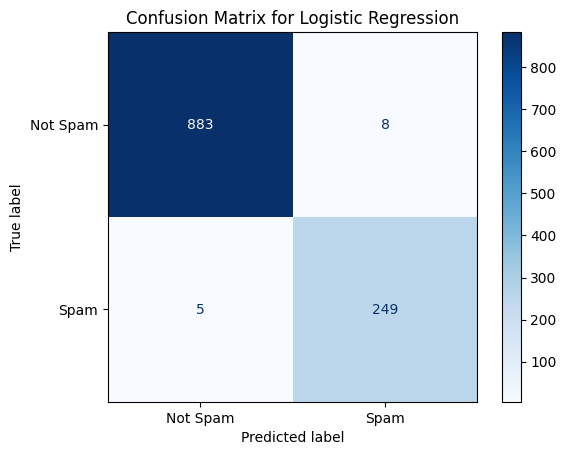

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model1.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [17]:
# the classification report of logistic regression
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'])

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.99      0.99      0.99       891
        Spam       0.97      0.98      0.97       254

    accuracy                           0.99      1145
   macro avg       0.98      0.99      0.98      1145
weighted avg       0.99      0.99      0.99      1145



multinomial Naive bayes model and evaluation

In [18]:
#Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
model2= MultinomialNB()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)


0.9912663755458515

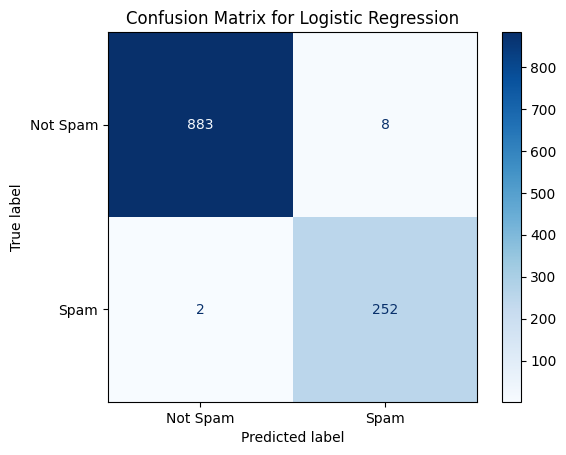

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model2.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [20]:
# the classification report of naive bayes
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'])

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

    Not Spam       1.00      0.99      0.99       891
        Spam       0.97      0.99      0.98       254

    accuracy                           0.99      1145
   macro avg       0.98      0.99      0.99      1145
weighted avg       0.99      0.99      0.99      1145

